<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/Data_analytics/blob/main/Yamaha_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Install library yang dibutuhkan
!pip install pandas nltk scikit-learn matplotlib seaborn wordcloud

# Import libraries
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud


# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
# Load data
df_kualitas = pd.read_csv('yamaha_kualitas.csv')
df_review = pd.read_csv('yamaha.csv')
df_service = pd.read_csv('yamaha_services.csv')


# Combine the dataframes
df_combined = pd.concat([df_kualitas, df_review, df_service], ignore_index=True)

# Tampilkan info dasar dataframe
print("Info data:")
df_combined.info()

# Tampilkan 5 baris pertama
print("\n5 Baris Pertama data:")
print(df_combined.head())

# Check jumlah data
print(f"\nTotal Data: {len(df_combined)}")

Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      415 non-null    int64 
 1   created_at               415 non-null    object
 2   favorite_count           415 non-null    int64 
 3   full_text                415 non-null    object
 4   id_str                   415 non-null    int64 
 5   image_url                136 non-null    object
 6   in_reply_to_screen_name  166 non-null    object
 7   lang                     415 non-null    object
 8   location                 293 non-null    object
 9   quote_count              415 non-null    int64 
 10  reply_count              415 non-null    int64 
 11  retweet_count            415 non-null    int64 
 12  tweet_url                415 non-null    object
 13  user_id_str              415 non-null    int64 
 14  username                 415 no

In [12]:
def preprocess_text(text):
    if isinstance(text, str):
        # 1. Lowercasing
        text = text.lower()

        # 2. Remove URL
        text = re.sub(r'http\S+', '', text)

        # 3. Remove mentions and hashtags
        text = re.sub(r'(@|#)\w+', '', text)

        # 4. Remove Punctuation
        text = re.sub(r'[^\w\s]', '', text)

        # 5. Remove Numbers
        text = re.sub(r'\d+', '', text)

        # 6. Tokenization
        tokens = nltk.word_tokenize(text)

        # 7. Remove Stopwords
        stop_words = set(stopwords.words('indonesian') + stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # 8. Stemming (Optional)
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]

        # 9. Join tokens back into text
        text = " ".join(tokens)
    else:
      text = "" # Handling non string text
    return text

# Apply preprocessing to 'full_text'
df_combined['cleaned_text'] = df_combined['full_text'].apply(preprocess_text)
print("\nContoh Cleaned Text:")
print(df_combined[['full_text', 'cleaned_text']].head())


Contoh Cleaned Text:
                                           full_text  \
0  @oscarguo @sociotalker 1. Perketat akreditasi ...   
1  @PizzaSisa @innovacommunity tapi buat maxi ser...   
2  Tingkatkan performa motor matic Anda dengan Sh...   
3  @ridwanhr Selamat ini pake yamaha dan sekitarn...   
4  @Mohammad_GP @ridwanhr Kalo nyari irit-rit-rit...   

                                        cleaned_text  
0  perketat akreditasi meningkatkan kualita perba...  
1  maxi seri yg kena kode eror kualita spull nya ...  
2  tingkatkan performa motor matic shok tabung kt...  
3  selamat pake yamaha eeh pa pengen pake honda m...  
4  kalo nyari iritritrit revo nyari lari nya ente...  


In [13]:
# Fungsi untuk labelling sentimen
def label_sentiment(text):
    if "bagus" in text or "oke" in text or "terbaik" in text or "unggul" in text or "recomended" in text or "keren" in text:
         return "positive"
    elif "jelek" in text or "buruk" in text or "ampas" in text or "busuk" in text or "error" in text or "matot" in text or "rugi" in text:
         return "negative"
    else:
      return "neutral"

df_combined['sentiment'] = df_combined['cleaned_text'].apply(label_sentiment)

# Display sentiment distribution
print("\nSentiment Distribution:")
print(df_combined['sentiment'].value_counts())

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_combined['cleaned_text'])

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, df_combined['sentiment'], test_size=0.2, random_state=42
)


# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions and Evaluate
y_pred = rf_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nF1 Score:")
print(f1_score(y_test, y_pred, average='weighted'))


Sentiment Distribution:
sentiment
neutral     365
positive     36
negative     14
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
     neutral       0.91      1.00      0.95        72
    positive       1.00      0.44      0.62         9

    accuracy                           0.92        83
   macro avg       0.64      0.48      0.52        83
weighted avg       0.90      0.92      0.89        83


Accuracy Score:
0.9156626506024096

F1 Score:
0.8939844963143454


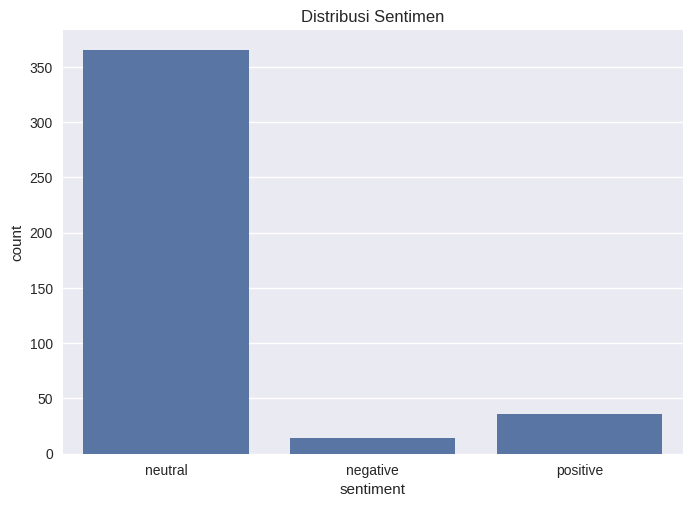

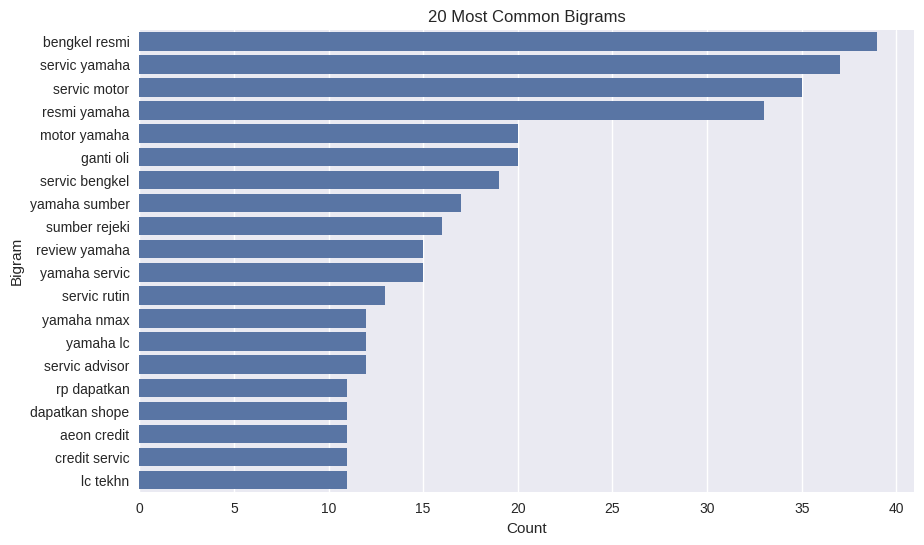

In [14]:
# Visualize sentiment distribution
sns.countplot(x='sentiment', data=df_combined)
plt.title('Distribusi Sentimen')
plt.show()


# Function to extract ngrams (default is bigrams)
def extract_ngrams(text, n=2):
    if isinstance(text, str):  # Check if text is a string
        tokens = nltk.word_tokenize(text)
        n_grams = ngrams(tokens, n)
        return [" ".join(grams) for grams in n_grams]
    else:
        return [] # Return an empty list if text is not a string



# Apply the function to create a column of bigrams
df_combined['bigrams'] = df_combined['cleaned_text'].apply(extract_ngrams)

# Flatten the list of bigrams
all_bigrams = [bigram for sublist in df_combined['bigrams'] for bigram in sublist]
bigram_counts = Counter(all_bigrams)
common_bigrams = bigram_counts.most_common(20)


# Visualize Most Common Bigrams
bigrams_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Bigram', data=bigrams_df)
plt.title('20 Most Common Bigrams')
plt.show()

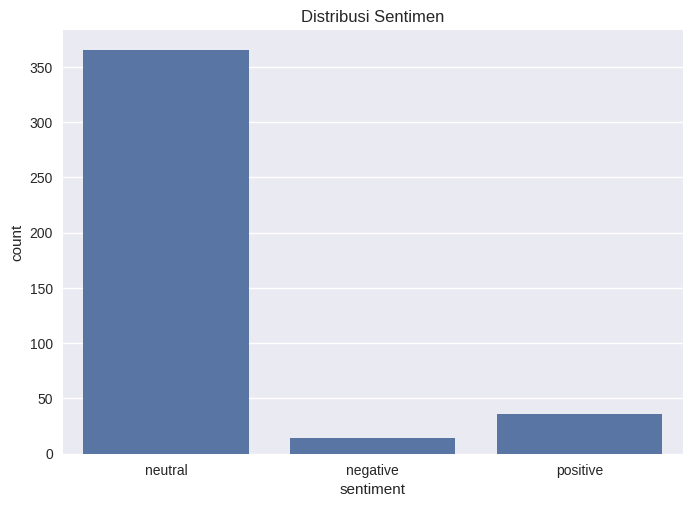

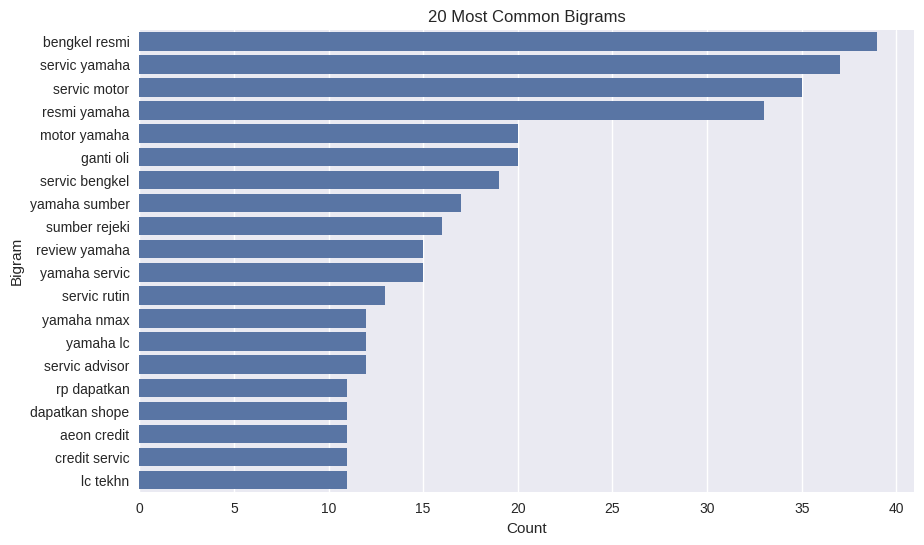

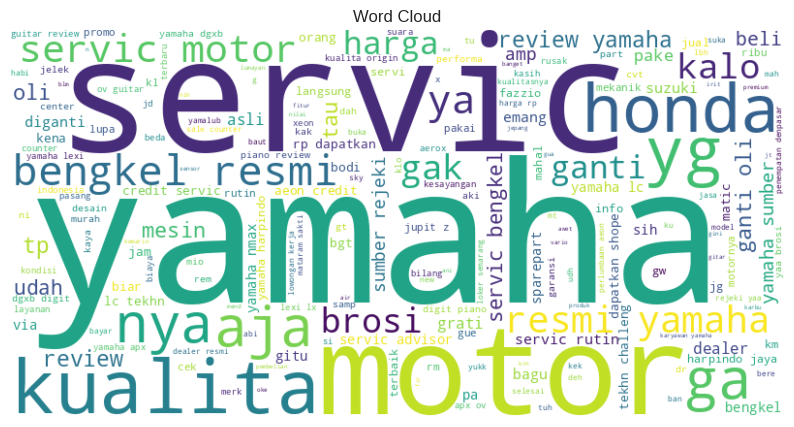

In [15]:
# Install library wordcloud
!pip install wordcloud

# Import wordcloud
from wordcloud import WordCloud

# Visualize sentiment distribution
sns.countplot(x='sentiment', data=df_combined)
plt.title('Distribusi Sentimen')
plt.show()


# Function to extract ngrams (default is bigrams)
def extract_ngrams(text, n=2):
    if isinstance(text, str):  # Check if text is a string
        tokens = nltk.word_tokenize(text)
        n_grams = ngrams(tokens, n)
        return [" ".join(grams) for grams in n_grams]
    else:
        return [] # Return an empty list if text is not a string



# Apply the function to create a column of bigrams
df_combined['bigrams'] = df_combined['cleaned_text'].apply(extract_ngrams)

# Flatten the list of bigrams
all_bigrams = [bigram for sublist in df_combined['bigrams'] for bigram in sublist]
bigram_counts = Counter(all_bigrams)
common_bigrams = bigram_counts.most_common(20)


# Visualize Most Common Bigrams
bigrams_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Bigram', data=bigrams_df)
plt.title('20 Most Common Bigrams')
plt.show()

# Word Cloud Visualization
all_text = " ".join(df_combined['cleaned_text'].astype(str)) # convert to str to handle NA values
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()